A* Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]


C:\Users\hp\AppData\Local\Temp\ipykernel_2852\4108203513.py:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis", 3)  # 0=unvisited, 1=visited, 2=path
d:\College Practicals\venv\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


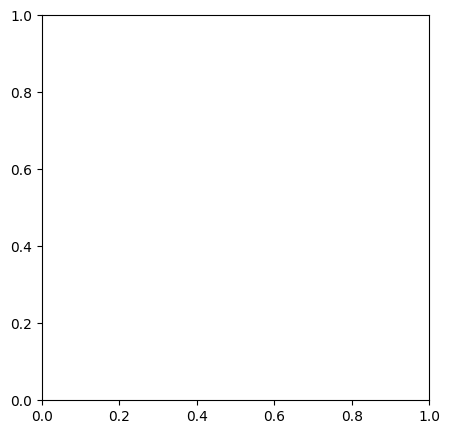

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import heapq

# Maze (0 = free, 1 = wall)
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)
rows, cols = len(maze), len(maze[0])

# Heuristic (Manhattan Distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* Algorithm with frames for animation
def astar(maze, start, goal):
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, goal), 0, start, [start]))
    visited = set()
    frames = []

    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        if current in visited:
            continue
        visited.add(current)

        # Save frame
        state = np.zeros((rows, cols))
        for (r, c) in visited:
            state[r, c] = 1  # visited
        for (r, c) in path:
            state[r, c] = 2  # current path
        frames.append(state)

        if current == goal:
            return path, frames

        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            x, y = current[0] + dx, current[1] + dy
            next_node = (x, y)
            if 0 <= x < rows and 0 <= y < cols and maze[x][y] == 0:
                if next_node not in visited:
                    new_g = g + 1
                    new_f = new_g + heuristic(next_node, goal)
                    heapq.heappush(open_set, (new_f, new_g, next_node, path + [next_node]))

    return None, frames

# Run A*
path, frames = astar(maze, start, goal)
print("A* Path:", path)

# ---- Animation ----
fig, ax = plt.subplots(figsize=(5, 5))
cmap = plt.cm.get_cmap("viridis", 3)  # 0=unvisited, 1=visited, 2=path

def update(i):
    ax.clear()
    ax.imshow(frames[i], cmap=cmap, vmin=0, vmax=2)
    ax.set_title("A* Traversal Step {}".format(i))
    ax.set_xticks([])
    ax.set_yticks([])

ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=500, repeat=False)
plt.show()


In [3]:
import heapq

# Maze: 0 = path, 1 = wall
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

# Manhattan distance heuristic
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* Algorithm
def astar(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, goal), 0, start, [start]))  # (f, g, node, path)
    visited = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)

        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            return path

        # Explore neighbors
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            x, y = current[0] + dx, current[1] + dy
            if 0 <= x < rows and 0 <= y < cols and maze[x][y] == 0:
                next_node = (x, y)
                if next_node not in visited:
                    new_g = g + 1
                    new_f = new_g + heuristic(next_node, goal)
                    heapq.heappush(open_set, (new_f, new_g, next_node, path + [next_node]))

    return None

# Function to print maze with path
def print_maze_with_path(maze, path):
    maze_copy = [row[:] for row in maze]  # deep copy

    for r, c in path:
        if (r, c) != start and (r, c) != goal:  # keep start and goal clear
            maze_copy[r][c] = "*"

    print("\nMaze with Path:")
    for r in range(len(maze_copy)):
        row_str = ""
        for c in range(len(maze_copy[0])):
            if (r, c) == start:
                row_str += "S "  # Start
            elif (r, c) == goal:
                row_str += "G "  # Goal
            elif maze_copy[r][c] == 1:
                row_str += "# "  # Wall
            elif maze_copy[r][c] == "*":
                row_str += "* "  # Path
            else:
                row_str += ". "  # Free space
        print(row_str)


# Run A*
path = astar(maze, start, goal)

if path:
    print("✅ A* Path Found:", path)
    print_maze_with_path(maze, path)
else:
    print("❌ No path found.")


✅ A* Path Found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]

Maze with Path:
S # . . . 
* # . # . 
* * * # . 
# # * # . 
. . * * G 
